# Bike Sharing Case Study

## Step 1: Importing Libraries, Reading and Understanding the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Ignore Warnings:

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Adjust views on Jupyter:

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### Importing Data:

In [4]:
bike = pd.read_csv("day.csv")

In [5]:
#Checking the head of Data set
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the Dimensions & Size of Dataframe:

In [6]:
#Dataframe Dimensions
print(bike.shape)

#Dataframe Size
print(bike.size)

(730, 16)
11680


In [7]:
#To check columns present in dataset
print(bike.columns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')


In [8]:
#Checking the numeric variables of the dataframes using describe()  
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [9]:
#Checking the number of null values in the Dataframe
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
#Checking for datatypes of columns 
bike.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Step2: Cleaning Data

In [11]:
#In the given data we can see that instant is an index column so we can drop it.
bike = bike.drop(['instant'], axis=1)

In [12]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
#Let's add new column "No_of_Days" variable, which will represent how old running the business.
bike['No_of_Days'] = (pd.to_datetime(bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [14]:
bike.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,No_of_Days
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [15]:
#We can see column dteday and yr/mnth are having same data. Therefore, we can drop "dteday" to avoid confusion.
bike = bike.drop(['dteday'], axis=1)

In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,No_of_Days
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [17]:
#We can see that casual/registered is equal to cnt and cnt is our target variable So we will drop casual/registered column.
bike = bike.drop(['casual','registered'], axis = 1)

In [18]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,No_of_Days
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [19]:
#Re-Checking the datatypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  No_of_Days  730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [20]:
#Renaming some columns for better understanding.
bike = bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity','cnt':'count'})

In [21]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,No_of_Days
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


- As per data this column <b>(season,yr,mnth,holiday,weekday,workingday,weathersit)</b>, all are in categorical variables.

## Step3: Exploratory Data Analysis [EDA]

- We will encoding the Labels & Visualization this column <b>(season,year,month,weekday and weathersit)</b>.

## 1) season
    1:spring
    2:summer
    3:fall
    4:winter

In [22]:
bike['season'] = bike['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"})

In [23]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,No_of_Days
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


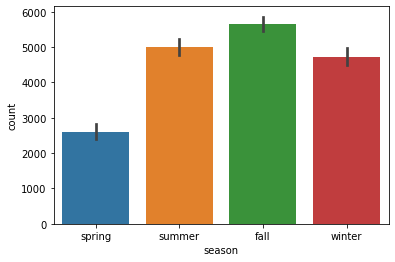

In [24]:
sns.barplot('season', 'count', data=bike)
plt.show()

As per the above bar, Bike rentals demands are more during the <b><u>Fall(Monsoon)</b></u> season.

## 2) Year
    0:2018
    1:2019

In [25]:
bike['year'] = bike['year'].replace({0:2018,1:2019})

In [26]:
bike.year.head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: year, dtype: int64

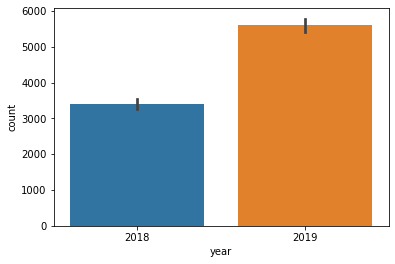

In [27]:
sns.barplot('year', 'count', data=bike)
plt.show()

Bike rentals demands has increased in <b><u>2019</b></u> compared to <b>2018</b>.

## 3) Month
    1:Jan
    2:Feb
    3:Mar
    4:Apr
    5:May
    6:June
    7:July
    8:Aug
    9:Sep
    10:Oct
    11:Nov
    12:Dec

In [28]:
bike['month'] = bike['month'].replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [29]:
bike.month.head()

0    Jan
1    Jan
2    Jan
3    Jan
4    Jan
Name: month, dtype: object

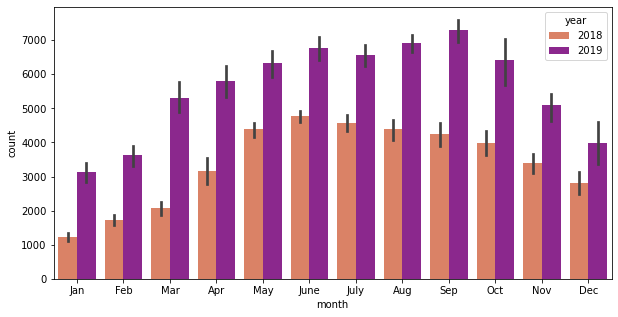

In [30]:
plt.figure(figsize=(10,5))
sns.barplot('month','count',hue='year',data=bike,palette='plasma_r')
plt.show()

Bike rentals demands are high in the month of <b>Sep</b> 2019.

## 4) WeekDay:
    0:Sun
    1:Mon
    2:Tue
    3:Wed
    4:Thu
    5:Fri
    6:Sat

In [31]:
bike['weekday'] = bike['weekday'].replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [32]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,No_of_Days
0,spring,2018,Jan,0,Sat,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,2018,Jan,0,Sun,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,2018,Jan,0,Mon,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,2018,Jan,0,Tue,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,2018,Jan,0,Wed,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


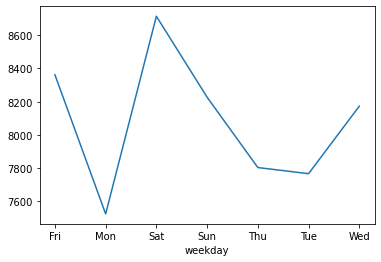

In [33]:
bike.groupby('weekday')['count'].max().plot(kind='line')
plt.show()

As per above plot Bike rentals are high demands during <b>Weekends</b>.

## 5) weathersit
    1: Clear, Few clouds, Partly cloudy, Partly cloudy
    2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [34]:
bike['weathersit'] = bike['weathersit'].replace({1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'})

In [35]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,No_of_Days
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4


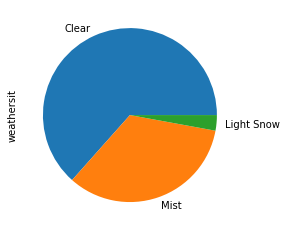

In [36]:
bike.weathersit.value_counts().plot(kind='pie')
plt.show()

As per above plot, Bikes seem to have demand more in <b>Partly Cloudy</b> weather.

### Visualising & Analysing Categorical variables with target variables

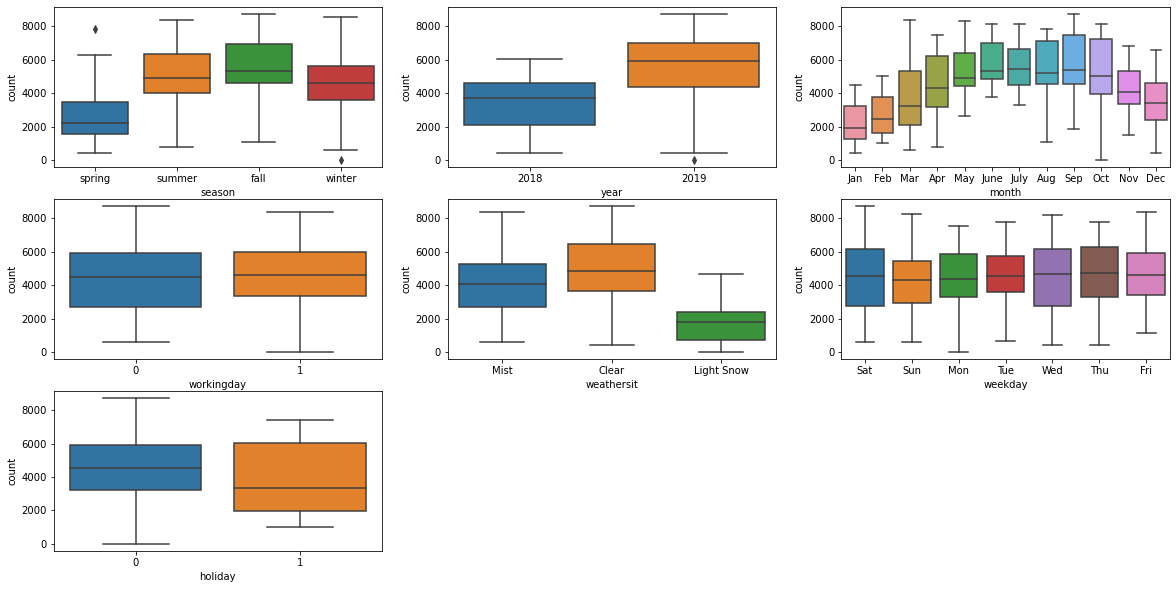

In [37]:
plt.figure(figsize=(20, 10))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'count', data = bike)
plt.subplot(3,3,2)
sns.boxplot(x = 'year', y = 'count', data = bike)
plt.subplot(3,3,3)
sns.boxplot(x = 'month', y = 'count', data = bike)
plt.subplot(3,3,4)
sns.boxplot(x = 'workingday', y = 'count', data = bike)
plt.subplot(3,3,5)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)
plt.subplot(3,3,6)
sns.boxplot(x = 'weekday', y = 'count', data = bike)
plt.subplot(3,3,7)
sns.boxplot(x = 'holiday', y = 'count', data = bike)
plt.show()

### Inference:

As per above box plot analysis, we can say that:

    1. In the Season category "3:fall" variable has the highest demand for rental bikes.
    2. In the Year category "2019" variable has the more demand for rental bikes.
    3. The Month category, we can say that the rental bikes are high demand on September months. However, if you
       see the trends March to June gradually increasing and between Aug & Oct.
    4. Working day we see very minor difference between weekdays vs weekends/holiday's.
    5. According to "weathersit" category, the "Clear" variables have high demands.
    6. Weekday is not having very huge difference, however we can say that Sat,Wed & Thu have increasing demands
    7. Holiday is not showing clear information.

### Pair-Plot To Understand and check Correlation between Numerical Variables

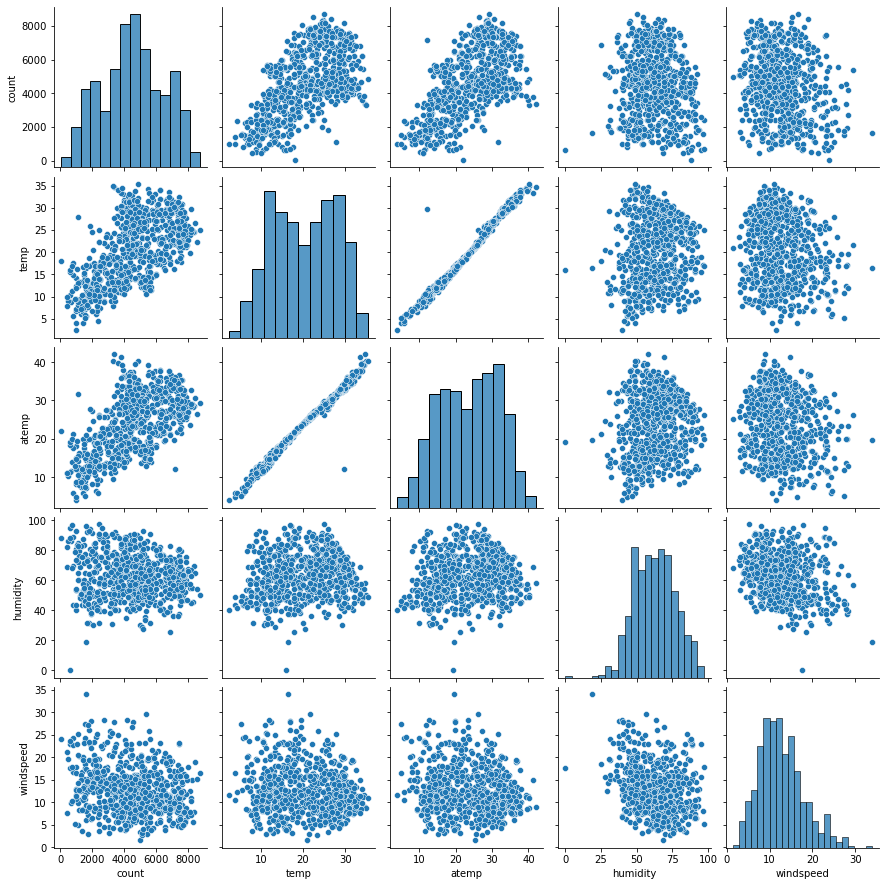

In [38]:
sns.pairplot(bike, vars=['count','temp','atemp','humidity','windspeed'])
plt.show()

The above plot shows that the <b>temp</b> and </b>atemp</b> has the highest corelation with the target variable <b>count</b>. Also. <b>temp</b> & <b>atemp</b> are highly co-related with each other.

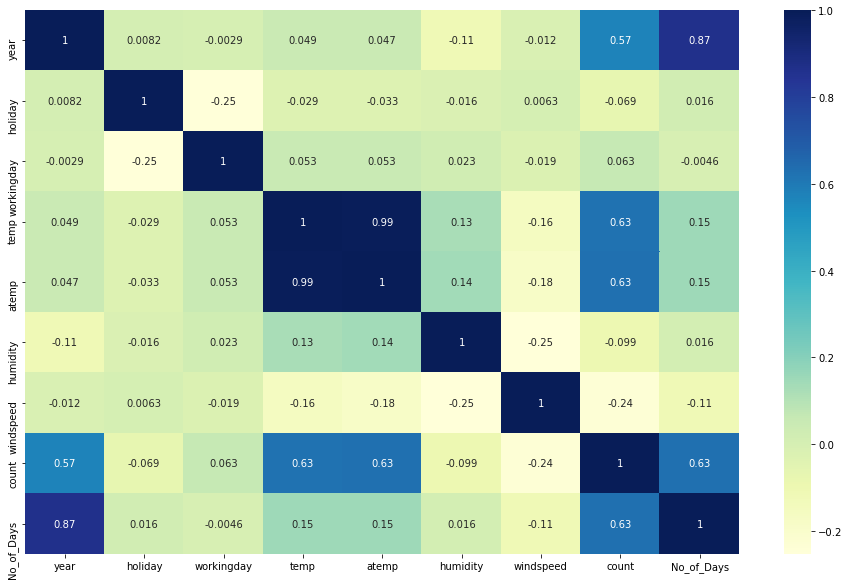

In [39]:
#Correlations for numeric variables
plt.figure(figsize = (16, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

There is high correlation between <b>temp & atemp</b> is <b><u>0.99</b></u>. Therefore, we can drop anyone either <b>temp</b> or <b>atemp</b>.

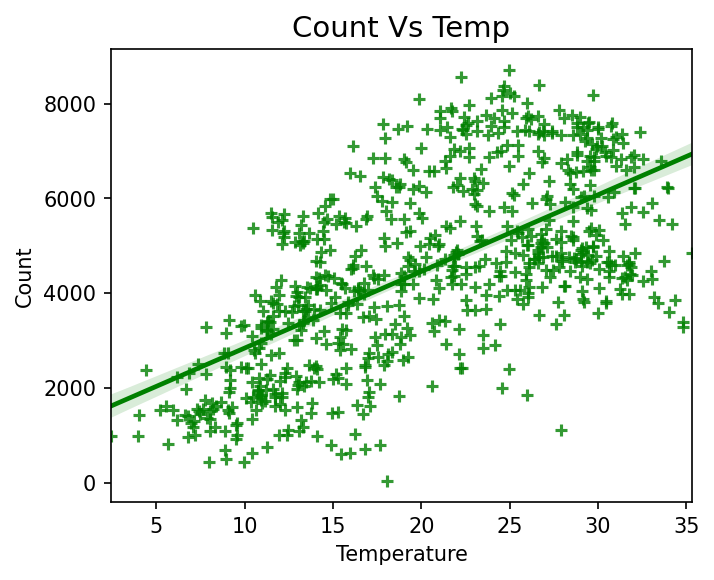

In [40]:
plt.figure(figsize=(5,4),dpi=150)
plt.title("Count Vs Temp",fontsize=14)
sns.regplot(data=bike,y="count",x="temp", marker="+", color="g")
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.show()

As per above plot we can say that the demand for bikes is <b>positively correlated</b> to <b>temp</b> and there is a linear relation between <b>Count & Temp</b>.

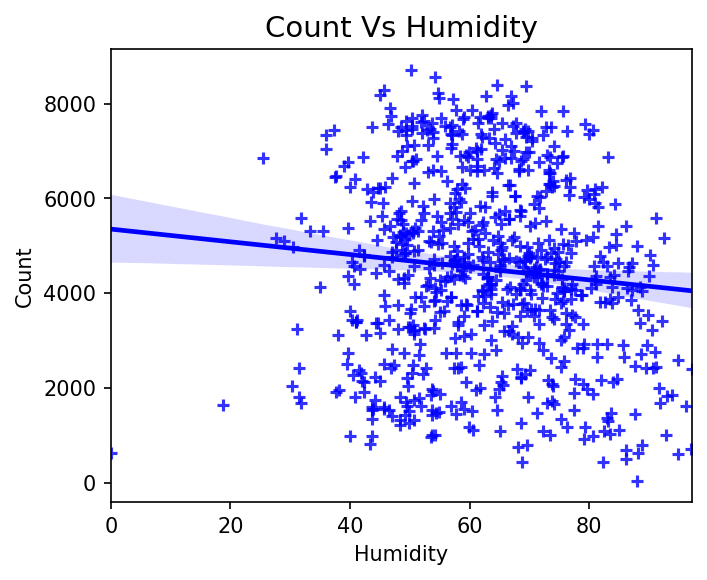

In [41]:
plt.figure(figsize=(5,4),dpi=150)
plt.title("Count Vs Humidity",fontsize=14)
sns.regplot(data=bike,y="count",x="humidity", marker="+", color="b")
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

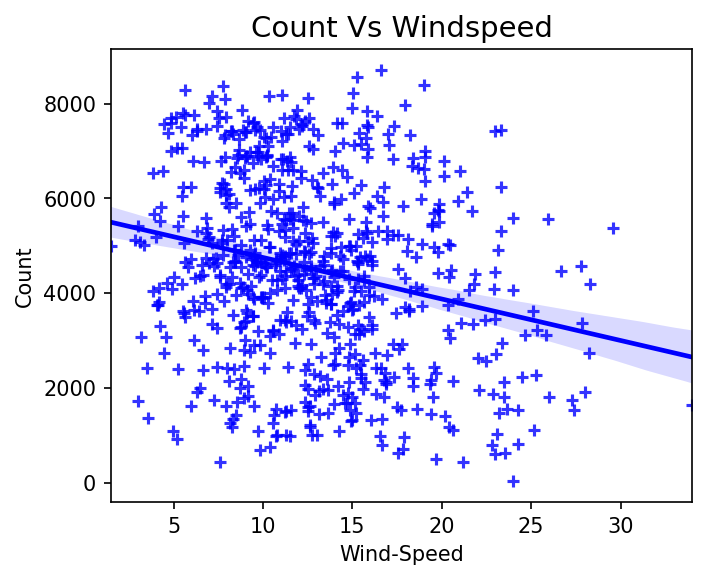

In [42]:
plt.figure(figsize=(5,4),dpi=150)
plt.title("Count Vs Windspeed",fontsize=14)
sns.regplot(data=bike,y="count",x="windspeed", marker="+", color="b")
plt.xlabel("Wind-Speed")
plt.ylabel("Count")
plt.show()

<b>Humidity & Windspeed</b> values are more scattered around. Also, we can say that the count is decresing with increase in <b>humidity & windspeed</b>.

## 4. Data Preparation for the Linear Regression Model.

In [43]:
#Creating Dummy Variables For The Categocial Data 
Season_condition = pd.get_dummies(bike['season'],drop_first=True)
Day_of_week = pd.get_dummies(bike['weekday'],drop_first=True)
Month = pd.get_dummies(bike['month'],drop_first=True)
Weather_condition = pd.get_dummies(bike['weathersit'])

We dropping the first columns as <b>(p-1)</b> dummies can explain <b>p</b> categories.

In [44]:
# Add the results to the original housing dataframe (bike)
bike = pd.concat([bike, Season_condition],axis=1)
bike = pd.concat([bike, Weather_condition],axis=1)
bike = pd.concat([bike, Day_of_week],axis=1)
bike = pd.concat([bike, Month],axis=1)

In [45]:
#Print columns after creating dummies
bike.columns

Index(['season', 'year', 'month', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed', 'count', 'No_of_Days', 'spring', 'summer', 'winter', 'Clear', 'Light Snow', 'Mist', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep'], dtype='object')

In [46]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 36 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
 12  No_of_Days  730 non-null    int64  
 13  spring      730 non-null    uint8  
 14  summer      730 non-null    uint8  
 15  winter      730 non-null    uint8  
 16  Clear       730 non-null    uint8  
 17  Light Snow  730 non-null    uint8  
 18  Mist        730 non-null    uint8  
 19  Mon         730 non-null    u

In [47]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,No_of_Days,spring,summer,winter,Clear,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [48]:
# Verify shape before split the data
bike.shape

(730, 36)

In [49]:
# Dropping the categorical variables (Original) as the dummy-encoded are done.

bike = bike.drop(['season','weathersit','weekday','month'], axis=1)

In [50]:
bike.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,No_of_Days,spring,summer,winter,Clear,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


### Splitting the Data into Training and Testing Sets

In [51]:
#Now are data is ready to split
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 42)

In [52]:
#Checking Shape for train & Test
print(bike_train.shape)
print(bike_test.shape)

(510, 32)
(219, 32)


### Rescaling the Features:

In [53]:
from sklearn.preprocessing import MinMaxScaler

# Initiate an Object
scaler=MinMaxScaler()

In [54]:
# Apply scaler() to all the columns except the 'dummy' variables.
# Create a list of numeric variables.

num_vars=['atemp','humidity','windspeed','count']
bike_train[num_vars]= scaler.fit_transform(bike_train[num_vars])

In [55]:
#Fit on Data

bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [56]:
bike_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,No_of_Days,spring,summer,winter,Clear,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
683,2019,0,1,13.188347,0.322150,0.639330,0.327101,0.605336,683,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
645,2019,1,0,15.716653,0.404998,0.731215,0.419004,0.609320,645,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
163,2018,0,1,26.035000,0.685963,0.509660,0.708724,0.554026,163,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
360,2018,0,1,13.325000,0.326273,0.785745,0.415925,0.088253,360,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
640,2019,0,1,26.957500,0.682653,0.817947,0.110593,0.862127,640,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [57]:
#To check MinMax Scaler work correctly.
bike_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,count,No_of_Days,spring,summer,winter,Clear,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,2018.521569,0.027451,0.668627,20.557443,0.526680,0.653801,0.414566,0.498206,374.078431,0.231373,0.256863,0.250980,0.625490,0.029412,0.345098,0.149020,0.150980,0.152941,0.147059,0.131373,0.139216,0.074510,0.074510,0.074510,0.088235,0.092157,0.084314,0.062745,0.092157,0.092157,0.090196,0.090196
std,0.500025,0.163554,0.471169,7.482398,0.213153,0.143542,0.185671,0.233905,212.931687,0.422124,0.437332,0.434003,0.484471,0.169124,0.475867,0.356457,0.358381,0.360284,0.354512,0.338139,0.346511,0.262857,0.262857,0.262857,0.283915,0.289531,0.278131,0.242742,0.289531,0.289531,0.286744,0.286744
min,2018.000000,0.000000,0.000000,2.424346,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,14.078139,0.352585,0.544033,0.281934,0.345950,186.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,0.000000,1.000000,21.371250,0.564951,0.659296,0.383964,0.502233,381.500000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,26.948962,0.698389,0.756762,0.525698,0.677080,561.750000,0.000000,1.000000,0.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2019.000000,1.000000,1.000000,35.328347,1.000000,1.000000,1.000000,1.000000,729.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the Model

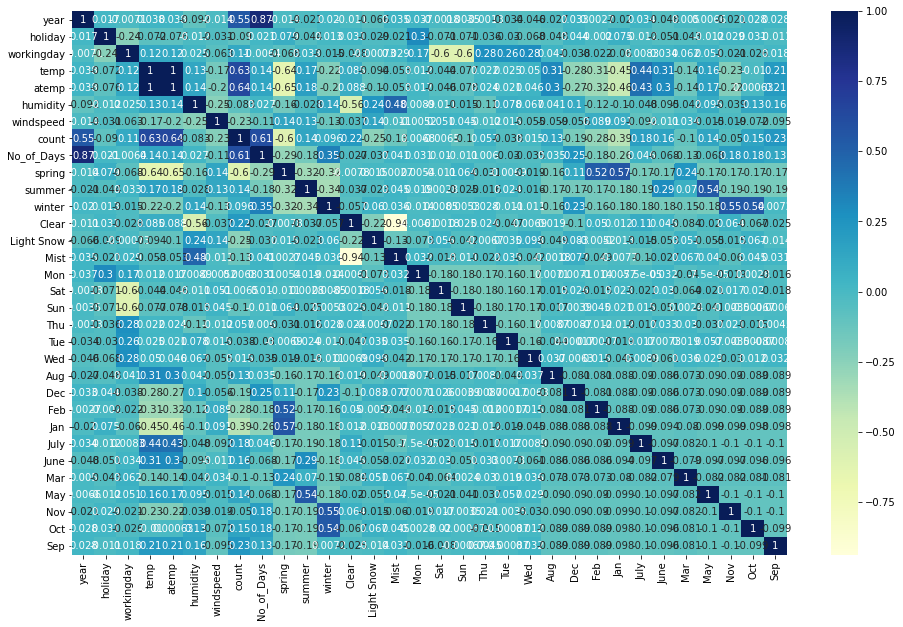

In [58]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(bike_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you have noticed, <b>atemp & temp</b> seems to the correlated to <b>count</b> the most.

### Dividing into X and Y sets for the model building

In [59]:
y_train = bike_train.pop('count')
X_train = bike_train

In [60]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,No_of_Days,spring,summer,winter,Clear,Light Snow,Mist,Mon,Sat,Sun,Thu,Tue,Wed,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
683,2019,0,1,13.188347,0.322150,0.639330,0.327101,683,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
645,2019,1,0,15.716653,0.404998,0.731215,0.419004,645,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
163,2018,0,1,26.035000,0.685963,0.509660,0.708724,163,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
360,2018,0,1,13.325000,0.326273,0.785745,0.415925,360,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
640,2019,0,1,26.957500,0.682653,0.817947,0.110593,640,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [61]:
y_train.head()

683    0.605336
645    0.609320
163    0.554026
360    0.088253
640    0.862127
Name: count, dtype: float64

## Step 5: Building a linear model

### Importing RFE and LinearRegression

In [62]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Using <b>Recursive Feature Elimination</b> (RFE) for automated Feature Selection approach.

In [63]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', False, 3),
 ('workingday', True, 1),
 ('temp', False, 14),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('No_of_Days', False, 17),
 ('spring', True, 1),
 ('summer', False, 11),
 ('winter', True, 1),
 ('Clear', True, 1),
 ('Light Snow', True, 1),
 ('Mist', False, 2),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 6),
 ('Thu', False, 13),
 ('Tue', False, 7),
 ('Wed', False, 12),
 ('Aug', False, 8),
 ('Dec', True, 1),
 ('Feb', False, 10),
 ('Jan', False, 15),
 ('July', True, 1),
 ('June', False, 16),
 ('Mar', True, 1),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1)]

In [65]:
col_new = X_train.columns[rfe.support_]
col_new

Index(['year', 'workingday', 'atemp', 'humidity', 'windspeed', 'spring', 'winter', 'Clear', 'Light Snow', 'Sat', 'Dec', 'July', 'Mar', 'Nov', 'Sep'], dtype='object')

In [66]:
X_train.columns[~rfe.support_]

Index(['holiday', 'temp', 'No_of_Days', 'summer', 'Mist', 'Mon', 'Sun', 'Thu', 'Tue', 'Wed', 'Aug', 'Feb', 'Jan', 'June', 'May', 'Oct'], dtype='object')

### Building the model using STATSMODEL, for the detailed statistics

### Model 1

In [67]:
# Creating X_test dataframe with RFE selected variables
X_train_lm = X_train[col_new]

In [68]:
# Importing STATSMOdel and adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_lm)

In [69]:
# Running the linear model
lm1 = sm.OLS(y_train,X_train_lm).fit()

In [70]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          7.32e-188
Time:                        20:47:04   Log-Likelihood:                 490.80
No. Observations:                 510   AIC:                            -949.6
Df Residuals:                     494   BIC:                            -881.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -478.3751     17.077    -28.013      0.0

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model.

In [71]:
#Importing VIF Lib
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16861838.97
3,atemp,3.61
6,spring,2.93
7,winter,2.19
4,humidity,1.88
14,Nov,1.72
8,Clear,1.64
2,workingday,1.60
10,Sat,1.58
12,July,1.36


### Model 2

In [72]:
#Column "Mar" has high p-value, let's drop and check.
X_train_lm = X_train_lm.drop(['Mar'],axis=1)

In [73]:
# Adding a constant variable & Running the linear model
X_train_lm1 = sm.add_constant(X_train_lm)
lm2 = sm.OLS(y_train,X_train_lm1).fit()

In [74]:
#Let's see the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.82e-187
Time:                        20:47:04   Log-Likelihood:                 487.12
No. Observations:                 510   AIC:                            -944.2
Df Residuals:                     495   BIC:                            -880.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -478.9142     17.182    -27.873      0.0

In [75]:
#Verify VIF 
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16859498.26
3,atemp,3.60
6,spring,2.89
7,winter,2.19
4,humidity,1.88
13,Nov,1.72
8,Clear,1.62
2,workingday,1.60
10,Sat,1.58
12,July,1.35


As atemp is highly co-related we can't remove that variable, let's try with humidity.

### Model 3

In [76]:
#VIF "humidity" will drop and check if there is any changes in P-Value & VIF.
X_train_lm = X_train_lm.drop(['humidity'],axis=1)

In [77]:
# Adding a constant variable & Running the linear model
X_train_lm2 = sm.add_constant(X_train_lm)
lm3 = sm.OLS(y_train,X_train_lm2).fit()

In [78]:
#Let's see the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     194.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.91e-185
Time:                        20:47:04   Log-Likelihood:                 478.39
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     496   BIC:                            -869.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -489.0542     17.284    -28.295      0.0

In [79]:
#Verify VIF 
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16519042.73
3,atemp,3.47
5,spring,2.88
6,winter,2.16
12,Nov,1.72
2,workingday,1.60
9,Sat,1.58
11,July,1.34
10,Dec,1.27
4,windspeed,1.12


- In VIF we can see small changes in <b>atemp</b>, however we have noticed p-value bit increase for <b>July & Sep</b>.
- Let's drop <b>July</b> column and re-verify.

### Model 4

In [80]:
#Drop "July" as it's have p-value 0.003 and re-verify. 
X_train_lm = X_train_lm.drop(['July'],axis=1)

In [81]:
# Adding a constant variable & Running the linear model
X_train_lm3 = sm.add_constant(X_train_lm)
lm4 = sm.OLS(y_train,X_train_lm3).fit()

In [82]:
#Let's see the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          3.38e-184
Time:                        20:47:04   Log-Likelihood:                 473.81
No. Observations:                 510   AIC:                            -921.6
Df Residuals:                     497   BIC:                            -866.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -487.6239     17.415    -27.999      0.0

In [83]:
#Verify VIF 
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16506448.29
3,atemp,3.00
5,spring,2.84
6,winter,2.15
11,Nov,1.71
2,workingday,1.59
9,Sat,1.58
10,Dec,1.26
4,windspeed,1.12
8,Light Snow,1.10


### Module 5

In [84]:
#Drop "windspeed" as this is not corelated with target variables. 
X_train_lm = X_train_lm.drop(['windspeed'],axis=1)

In [85]:
# Adding a constant variable & Running the linear model
X_train_lm4 = sm.add_constant(X_train_lm)
lm5 = sm.OLS(y_train,X_train_lm4).fit()

In [86]:
#Let's see the summary of our linear model
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.26e-183
Time:                        20:47:04   Log-Likelihood:                 468.40
No. Observations:                 510   AIC:                            -912.8
Df Residuals:                     498   BIC:                            -862.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -486.8594     17.582    -27.691      0.0

In [87]:
#Verify VIF 
vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16503464.79
3,atemp,2.87
4,spring,2.82
5,winter,2.09
10,Nov,1.71
2,workingday,1.59
8,Sat,1.58
9,Dec,1.25
6,Clear,1.08
7,Light Snow,1.08


### Inference - Model 5:

We can say that VIF seems to be almost accepted and the p-value for all the features are 0 and the R2 value is 0.829. Let's select Model 5 as our final model, which has all important statistics high (R-square, Adjusted R-squared and F-statistic). Another important thing is that difference between R-squared and Adjusted R-squared values for this model is veryless, so we no need to perform additional parameters that can be removed from this model. which also means that there are no additional parameters that can be removed from this model.


## Step 6. Model Evaluation

### Residucal Analysis:

In [88]:
#Predict values
y_train_count = lm5.predict(X_train_lm4)

Text(0.5, 0, 'Errors')

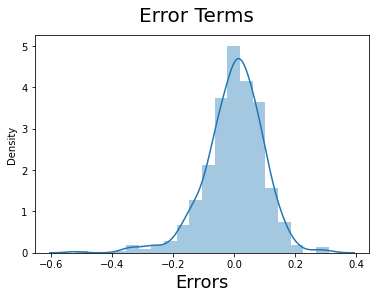

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

In [90]:
#Checking total number of columns on Model-4
X_train_lm4.columns

Index(['const', 'year', 'workingday', 'atemp', 'spring', 'winter', 'Clear', 'Light Snow', 'Sat', 'Dec', 'Nov', 'Sep'], dtype='object')

In [91]:
print(X_train_lm4.shape)
print(y_train_count.shape)

(510, 12)
(510,)


In [93]:
#Print R-squared Value for Training Data Set.
from sklearn.metrics import r2_score
r2_score(y_train,y_train_count)

0.829170242539528

### Let's predict the values for Test data set

In [94]:
#Scale variables in X_test
num_vars = ['atemp','humidity','windspeed','count']

#Test data will be perform on transformed only.
bike_test[num_vars] = scaler.transform(bike_test[num_vars])

In [95]:
#Creating X and Y sets

y_test = bike_test.pop('count')
X_test = bike_test

In [96]:
X_train_lm4.columns

Index(['const', 'year', 'workingday', 'atemp', 'spring', 'winter', 'Clear', 'Light Snow', 'Sat', 'Dec', 'Nov', 'Sep'], dtype='object')

In [97]:
X_train_new=X_train_lm4.drop(['const'], axis=1)

In [98]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [100]:
# Making predictions on this final Model
y_test_pred = lm5.predict(X_test_new)

Text(0, 0.5, 'y_pred')

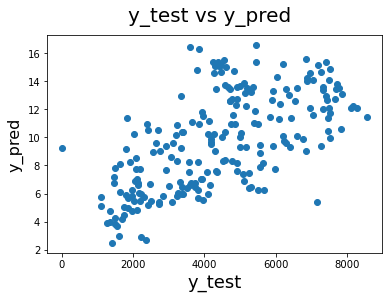

In [101]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)        
plt.xlabel('y_test', fontsize = 18)                     
plt.ylabel('y_pred', fontsize = 16)                         

### R-Squared value for Test Predictions

In [102]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

r2_score(y_test, y_test_pred)

-5.19973922683179

In [103]:
print(X_train_lm4.columns)
print(lm5.summary())

Index(['const', 'year', 'workingday', 'atemp', 'spring', 'winter', 'Clear', 'Light Snow', 'Sat', 'Dec', 'Nov', 'Sep'], dtype='object')
                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     219.7
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          4.26e-183
Time:                        20:50:11   Log-Likelihood:                 468.40
No. Observations:                 510   AIC:                            -912.8
Df Residuals:                     498   BIC:                            -862.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.9

## The equation for best fitted line is:

### year + 0.241 X workingday + 0.052 X atemp + 0.409 X spring - 0.156 X winter + 0.922 X Clear + 0.080 X Light Snow - 0.203 X Sat + 0.054 X Dec - 0.073 X Nov - 0.090 X Sep + 0.060

## Conclusion

<b>Below are the significant variables to predict the demand for rented bikes</b>

    - Year(2019)
    - temp
    - Season(Spring & winter)
    - months(November, December)
    - Sat
    - weathersit(Clear, Light Snow)
